# 訓練とテスト

モデルを構築する対象のデータを作るところから始めます。今回はモデルに多項式回帰を用います。

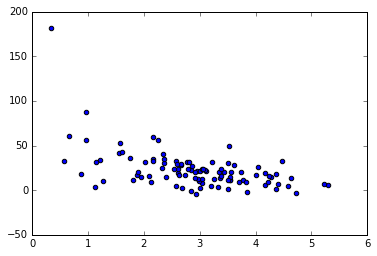

In [2]:
%matplotlib inline
import numpy as np
from pylab import *

np.random.seed(2)

pageSpeeds = np.random.normal(3.0, 1.0, 100)
purchaseAmount = np.random.normal(50.0, 30.0, 100) / pageSpeeds


scatter(pageSpeeds, purchaseAmount)

データを二つに分割します。80%は訓練データ、残り20%はテストデータとします。これにより、過剰適合が避けられるでしょう。

In [3]:
trainX = pageSpeeds[:80]
testX = pageSpeeds[80:]

trainY = purchaseAmount[:80]
testY = purchaseAmount[80:]


訓練データを表示します。

In [4]:
scatter(trainX, trainY)

テストデータを表示します。

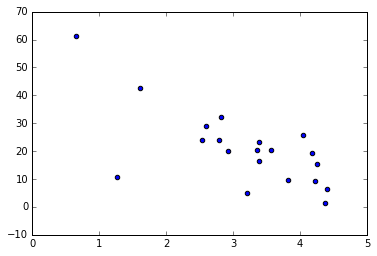

In [5]:
scatter(testX, testY)

訓練データに、8次の多項式回帰を行います。これは明らかに過剰適合になります。

In [6]:
x = np.array(trainX)
y = np.array(trainY)

p4 = np.poly1d(np.polyfit(x, y, 8))

訓練データと、多項式回帰の曲線を表示しましょう。

In [7]:
import matplotlib.pyplot as plt

xp = np.linspace(0, 7, 100)
axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0, 200])
plt.scatter(x, y)
plt.plot(xp, p4(xp), c='r')
plt.show()


そして、テストデータにも多項式回帰の曲線を重ねてみます。

In [8]:
testx = np.array(testX)
testy = np.array(testY)

axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0, 200])
plt.scatter(testx, testy)
plt.plot(xp, p4(xp), c='r')
plt.show()

見た感じではそんなに悪くないようです。しかしながら、R-二乗値がひどいことになっています。このことは、このモデルがあまり良くないことを意味します。

In [9]:
from sklearn.metrics import r2_score

r2 = r2_score(testy, p4(testx))

print r2


0.300181686124


訓練データのR-二乗値は高めですね。

In [10]:
from sklearn.metrics import r2_score

r2 = r2_score(np.array(trainY), p4(np.array(trainX)))

print r2

0.642706951469


PandasのDataFrameを使っているのであれば、scikit-learnに内包されているtrain_test_split関数が訓練用データとテストデータを分割してくれます。

他の訓練/テストの手法に関しては、後ほど解説します。K-分割交差検証法では、K個に分割したデータのそれぞれをテストデータ、残りを訓練データとすることで、偶然により良い結果が得られることを防ぎます。

## Activity

様々な次数の多項式によるフィッティングにより、テストデータのR-二乗値がどうなるか確かめてみましょう。どの次数が最良でしょうか？